## Studying the data distribution in each attribute and sharing my findings

In [9]:
# Importing all the requisite libraries

import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

sns.set(color_codes=True)
%matplotlib inline 

In [10]:
# Reading the dataset

bank_df = pd.read_excel(r'C:\Users\rdsri\OneDrive\Bank_Personal_Loan_Modelling.xlsx')

In [11]:
# Using head() function to check whether the data is fetched or not
# Displaying the first 10 rows of the dataframe

bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


 ## Performing basic Exploratory Data Analysis

In [12]:
# Checking the dimension of the dataframe
bank_df.shape

(5000, 14)

The insurance dataframe contains 5000 instances with 14 attributes

In [13]:
# Checking for the data type of each attribute in the dataset
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Based on all the above information, we can identify that 

Below are the nominal attributes-

- The attribute 'ID' contains just a serial number. This number is not associated to the customer's bank ID or any other bank details. It jsut provides a unique number to each row in the dataset
- ZIP Code

Below attributes that contain binary values-

- Personal Loan (Target Variable): The value of this attribute states if the customer had accepted the personal loan offered in the last campaign or not.
- Securities Account: The value of this attribute states whether the customer has a securities account with the bank or not.
- CD Account: The value of this attribute states whether the customer has a Certificate of Deposit (CD) account with the bank or not.
- Online: The value of this attribute states whether the customer uses internet banking facilities or not.
- Credit Card: The value of this attribute states whether the customer uses a credit card issued by the bank or not.

Below attributes can be considered as Interval attributes:

- Age: Age of the customer
- Experience: Years of experience
- Income: Annual income in dollars
- CCAvg: Average credit card spending per month
- Mortage: Value of House Mortgage

Below attributes can be considered as Ordinal attributes:

- Family: Family size of the customer
- Education: Education level of the customer where
    1. Undergrad
    2. Graduate
    3. Advanced/Professional

In [14]:
# Checking for missing values in the dataset
bank_df.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

There are no null values in the dataset

In [15]:
# Getting the descriptive statistics of the attributes in the dataset
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [16]:
# There is an error in Experience (min = -3) because experience value cannot be measured negatively. 
# Finding the number of errored values for this attribute

bank_df[bank_df['Experience'] < 0].shape

(52, 14)

There are 52 records where the Experience value is incorrect.

In [17]:
# Correcting the data
# The abs() function of Python's standard library returns the absolute value of the given number. 
# Absolute value of a number is the value without considering its sign.

bank_df['Experience']=abs(bank_df['Experience'])
pd.DataFrame(bank_df['Experience'].describe())

,Experience
count,5000.000000
mean,20.134600
std,11.415189
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,43.000000


 ## Univariate & Bivariate distribution of the attributes

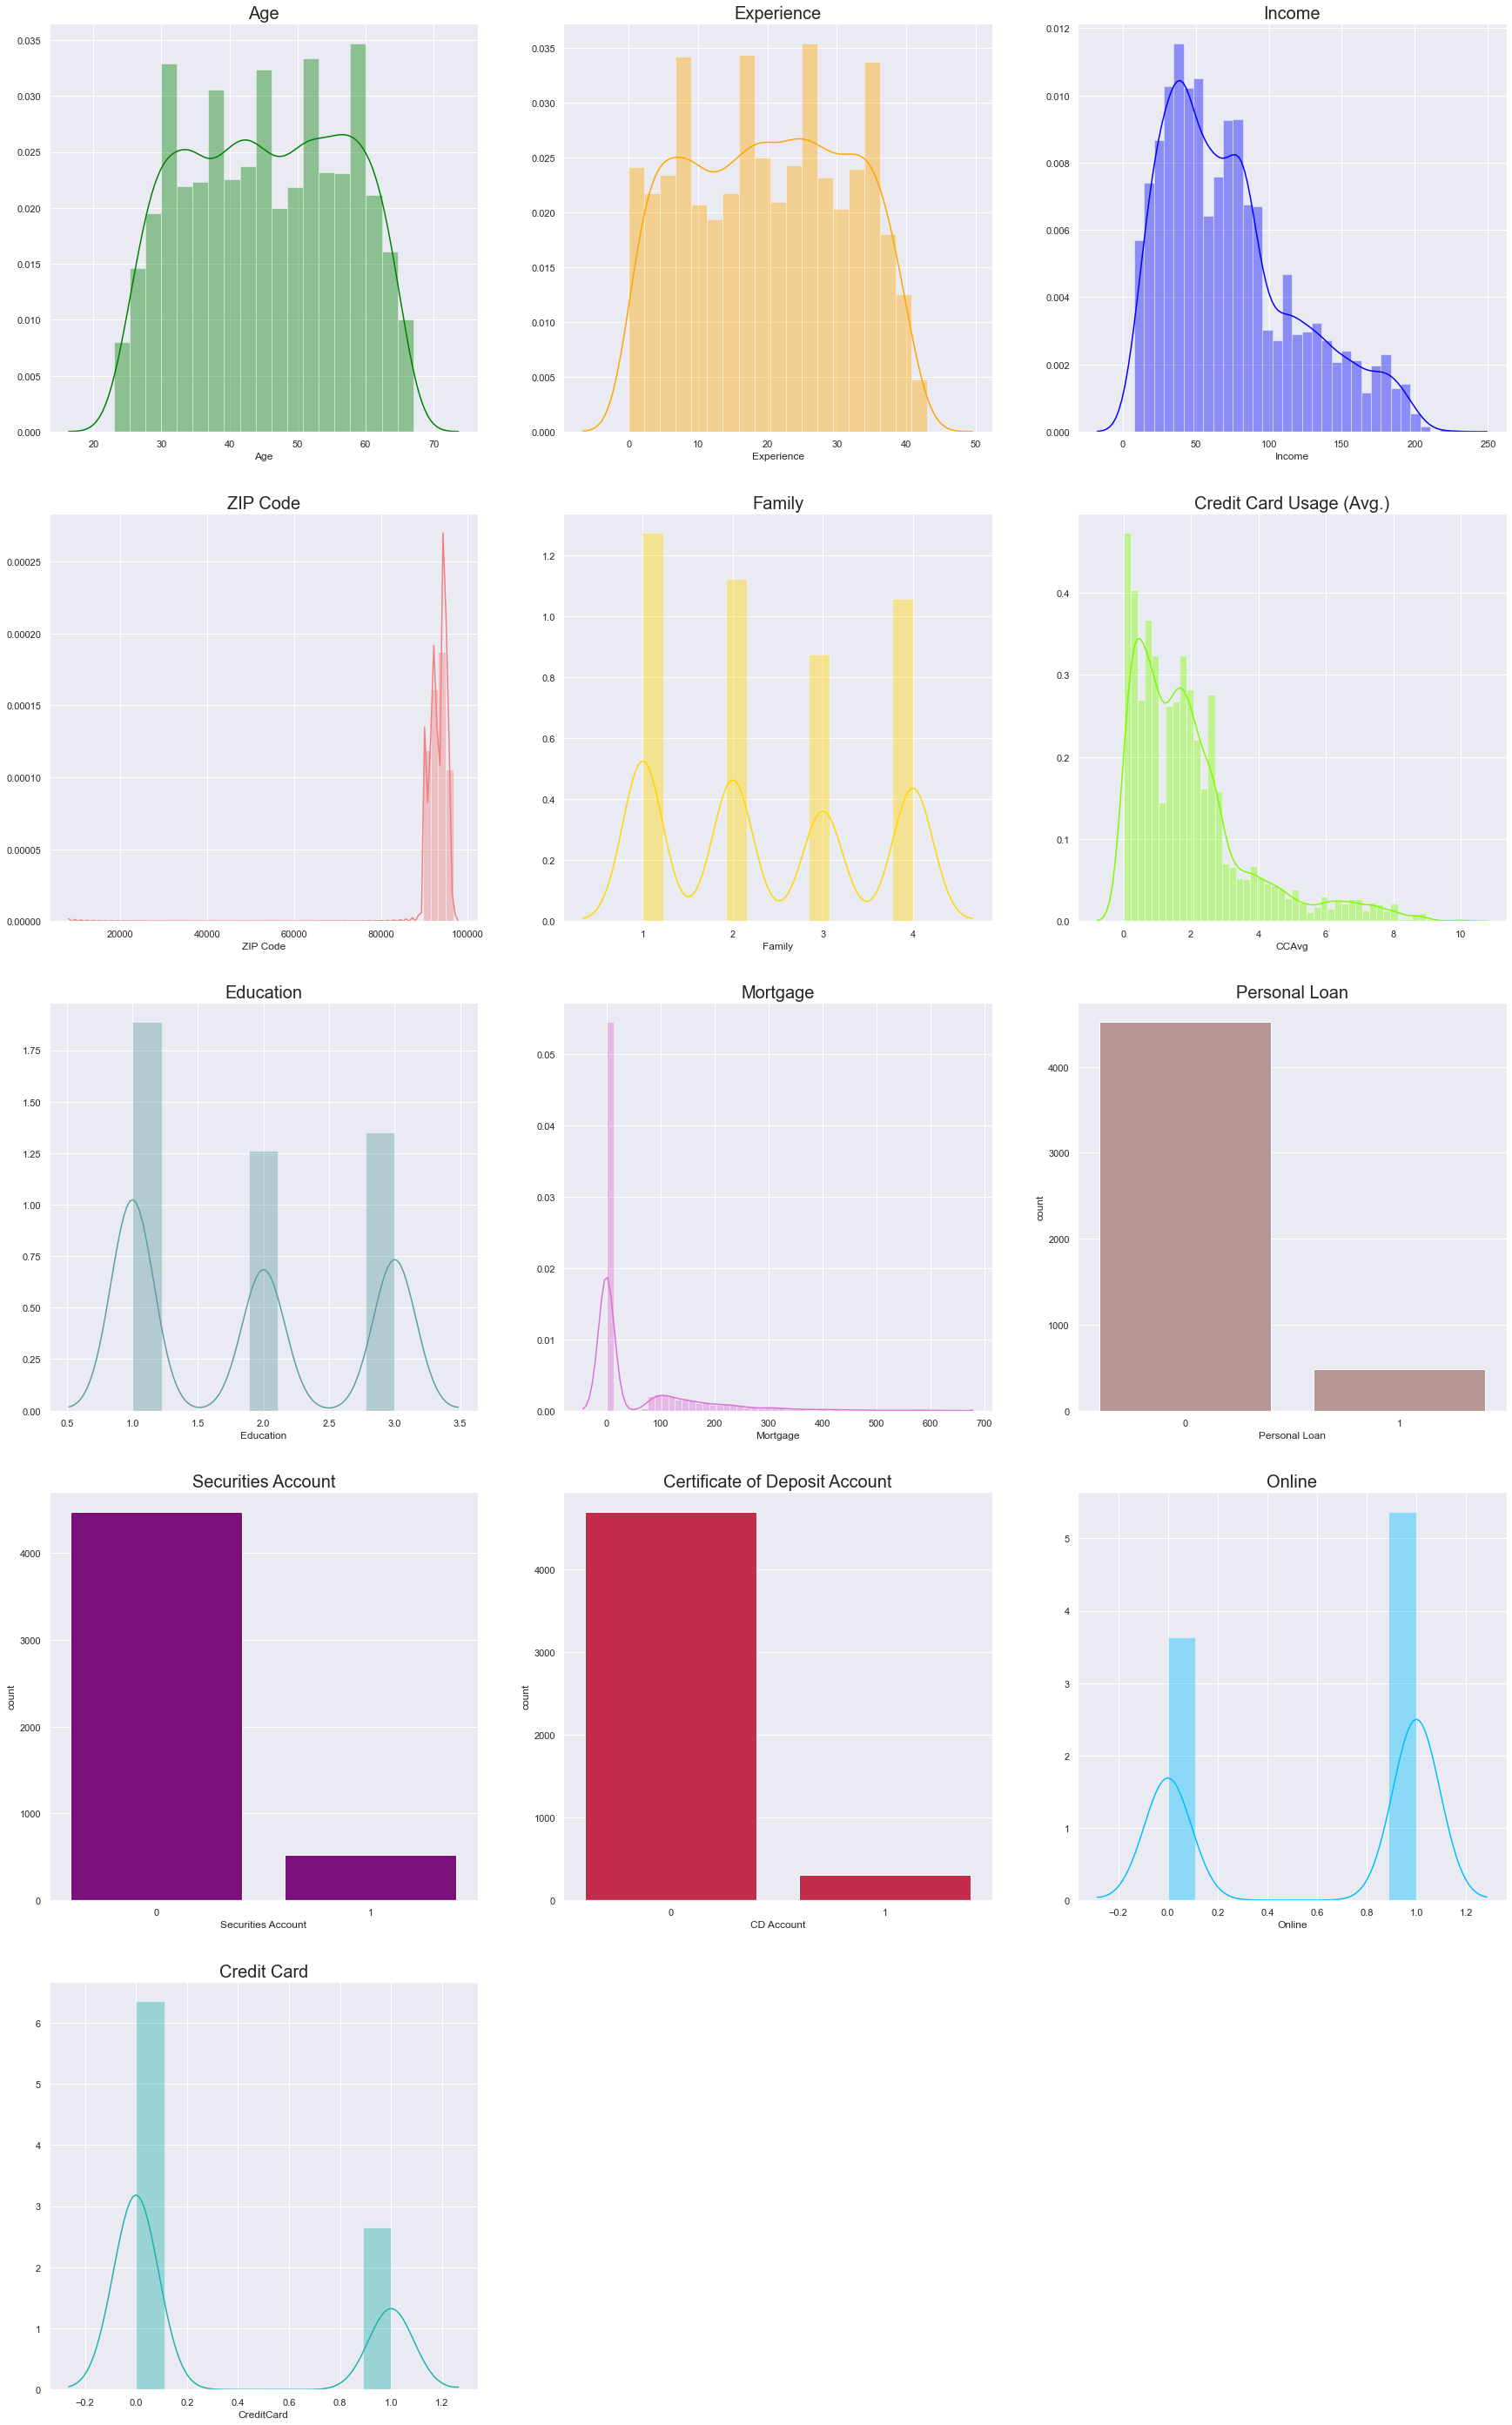

In [18]:
#Univariate distribution

plt.figure(figsize=(30,50))

#Distribution of Age
plt.subplot(5,3,1)
plt.title(label = 'Age', fontsize = 20)
sns.distplot(bank_df['Age'],color='Green')

#Distribution of Experience
plt.subplot(5,3,2)
plt.title(label = 'Experience', fontsize = 20)
sns.distplot(bank_df['Experience'], color='Orange')

#Distribution of Income
plt.subplot(5,3,3)
plt.title(label = 'Income', fontsize = 20)
sns.distplot(bank_df['Income'], color='Blue')

#Distribution of ZIP Code
plt.subplot(5,3,4)
plt.title(label = 'ZIP Code', fontsize = 20)
sns.distplot(bank_df['ZIP Code'],color='Lightcoral')

#Distribution of Family
plt.subplot(5,3,5)
plt.title(label = 'Family', fontsize = 20)
sns.distplot(bank_df['Family'], color='Gold')

#Distribution of Credit Card Usage Average
plt.subplot(5,3,6)
plt.title(label = 'Credit Card Usage (Avg.)', fontsize = 20)
sns.distplot(bank_df['CCAvg'], color='Lawngreen')

#Distribution of Education
plt.subplot(5,3,7)
plt.title(label = 'Education', fontsize = 20)
sns.distplot(bank_df['Education'],color='Cadetblue')

#Distribution of Mortgage
plt.subplot(5,3,8)
plt.title(label = 'Mortgage', fontsize = 20)
sns.distplot(bank_df['Mortgage'], color='Orchid')

#Distribution of Personal Loan
plt.subplot(5,3,9)
plt.title(label = 'Personal Loan', fontsize = 20)
sns.countplot(bank_df['Personal Loan'], color='Rosybrown')

#Distribution of Securities Account
plt.subplot(5,3,10)
plt.title(label = 'Securities Account', fontsize = 20)
sns.countplot(bank_df['Securities Account'],color='Darkmagenta')

#Distribution of Certificate of Deposit Account
plt.subplot(5,3,11)
plt.title(label = 'Certificate of Deposit Account', fontsize = 20)
sns.countplot(bank_df['CD Account'], color='Crimson')

#Distribution of Online
plt.subplot(5,3,12)
plt.title(label = 'Online', fontsize = 20)
sns.distplot(bank_df['Online'], color='Deepskyblue')

#Distribution of Bank Credit Card holder or not
plt.subplot(5,3,13)
plt.title(label = 'Credit Card', fontsize = 20)
sns.distplot(bank_df['CreditCard'], color='Lightseagreen')

plt.show()       #Displaying all the figures

In [19]:
# Dropping ID attribute has it does not add meaning to the data.

bank_df = bank_df.drop(['ID'],axis=1)

In [20]:
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


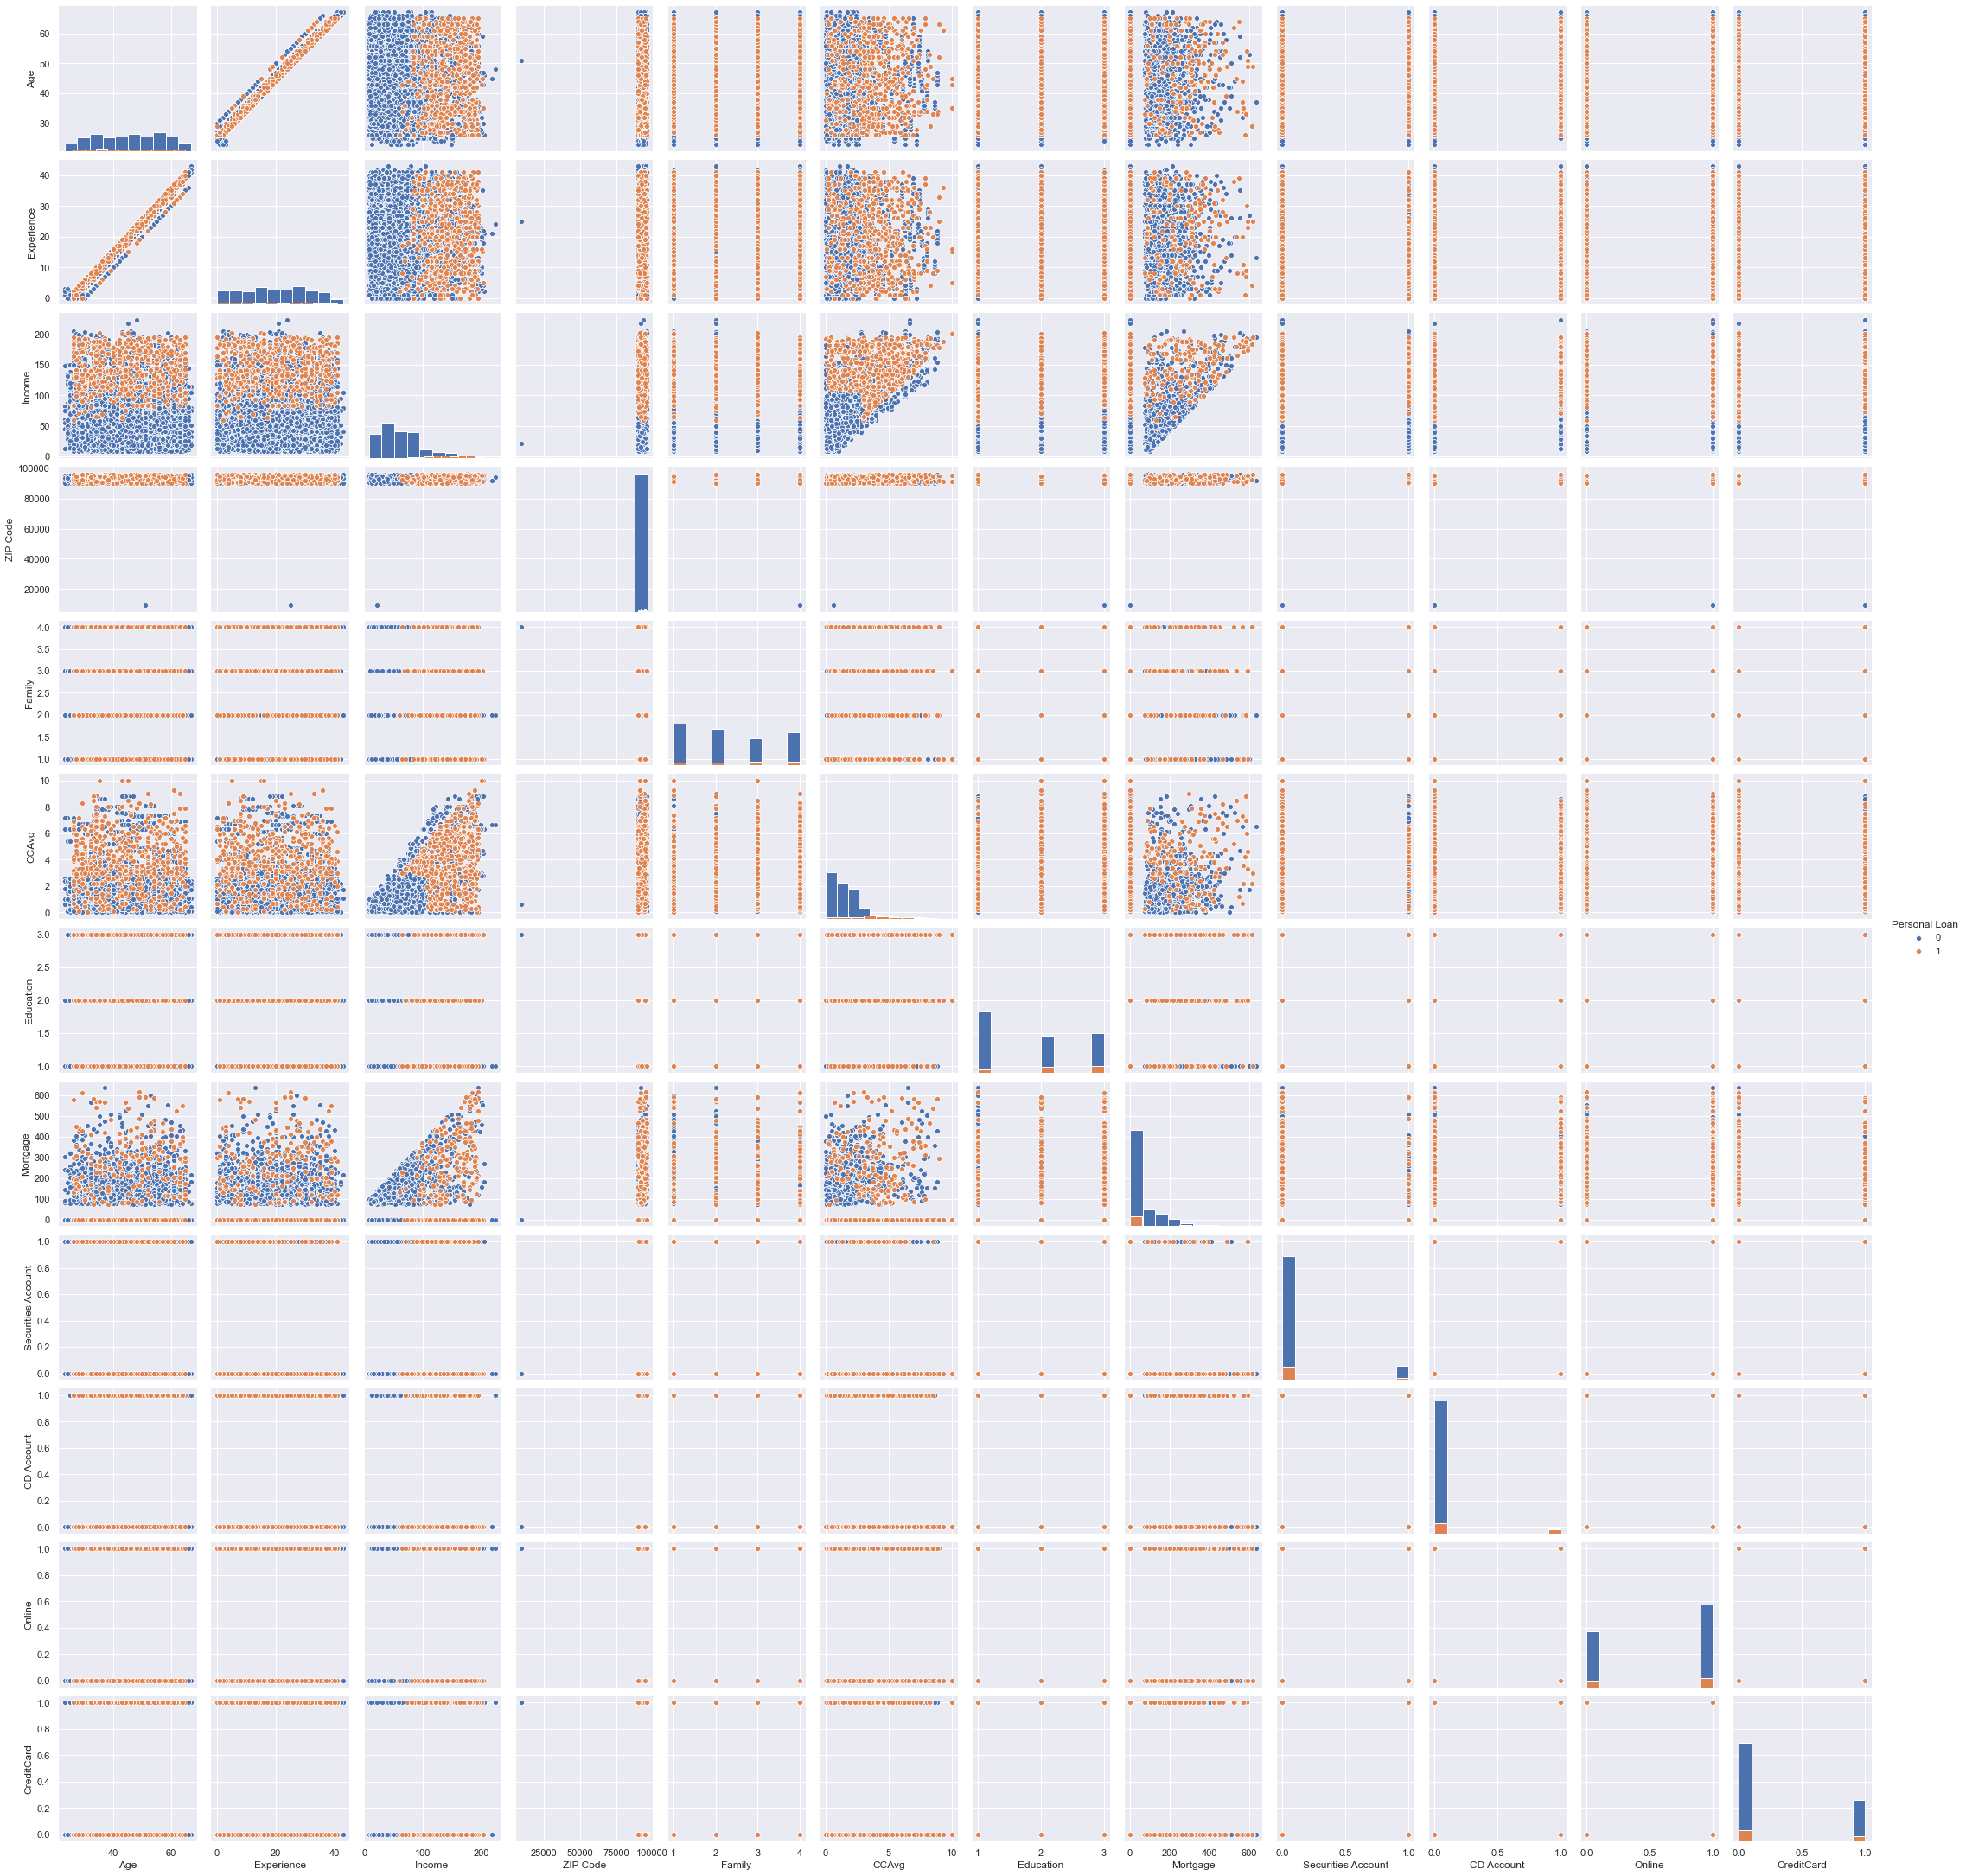

In [21]:
#Bivariate distribution of all the attributes

sns.pairplot(bank_df, diag_kind = 'hist', hue = 'Personal Loan')

plt.show()

- The column 'ID' is a nominal variable. It does not hold important information because it does not showcase any association between a person's customer ID and loan and also it does not provide any general conclusion for future potential loan customers. Therefore, ignoring this column information.
- Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age.
- Experience is normally distributed with more customer having experience starting from 8 years. There are negative values in the Experience Column. This could be a data input error as in general it is not possible to measure negative years of experience. Hence, deleted those values.
- Income is left skewed. Majority of the customers have income between 45K and 65K.
- ZIP Code is a nominal variable here.
- Family column is evenly distributed.
- CCAvg is left skewed and average spending is between 0K to 10K and majority spends less than 3K.
- Education is an ordinal categorical variable and as per the graph, we can state that majority are Under Graduates.
- Mortgage data states that 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.
- Personal Loan has binary data. And we can state that very less number of people accepted personal loan offer during the previous campaign.
- And hence, there are less number of Securities Account holders. The data in this column is binary.
- Also, Certificate of Deposit Account (CD) holders are less in number. The data in this column is binary.
- Online column depicts that there are many number of people who use the Internet Banking facilities.
- Credit Card column data states that there are a very few number of people who use the bank provided credit card
- Experience and age have very high correlation value, which is expected. 
- Income and CCAvg spend also have a strong correlation value.

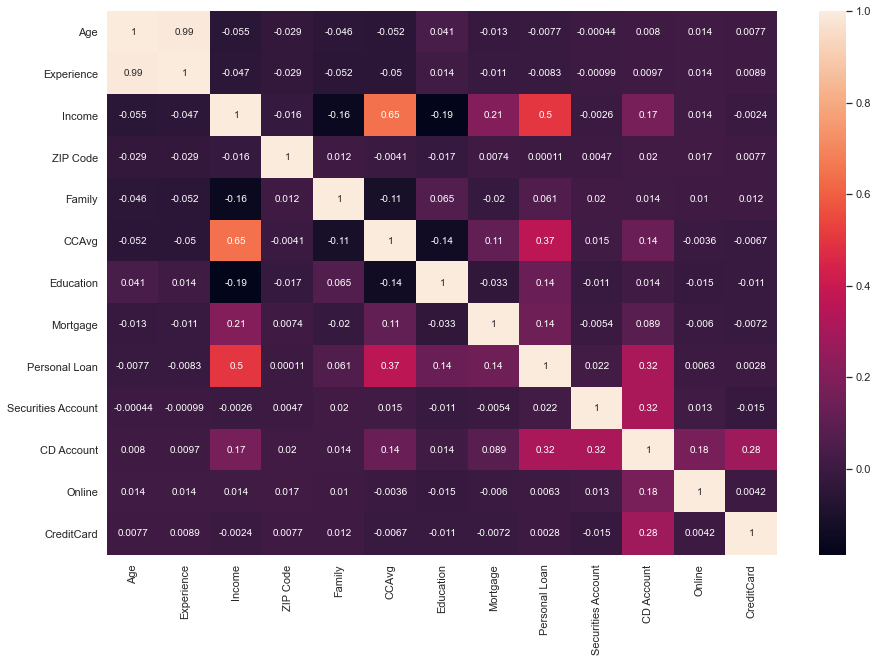

In [22]:
# Checking for the correlation between the attributes

bank_corr=bank_df.corr()

plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,annot=True)

plt.show()

- Income and CCAvg is moderately correlated.
- Income and Personal Loan is moderately correlated.
- Age and Experience is highly correlated which is obvious.

 ## Getting the target column distribution

In [74]:
# Calculating the ratio of people with Personal Loan & without Personal Loan

n_true = len(bank_df.loc[bank_df['Personal Loan'] == True])
n_false = len(bank_df.loc[bank_df['Personal Loan'] == False])
print("Number of customers with Personal Loan: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers without Personal Loan: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers with Personal Loan: 480 (9.60%)
Number of customers without Personal Loan: 4520 (90.40%)


So, its evident that we have 480 (9.60%) instances in the current data set who have taken Personal Loan and rest of 4520 instances (90.40%) have not taken any Personal Loan.

In [65]:
bank_df.groupby(['Personal Loan']).agg(['mean','median']).T

Personal Loan                         0             1
Age                mean       45.367257     45.066667
                   median     45.000000     45.000000
Experience         mean       20.165487     19.843750
                   median     20.000000     20.000000
Income             mean       66.237389    144.745833
                   median     59.000000    142.500000
ZIP Code           mean    93152.428761  93153.202083
                   median  93437.000000  93407.000000
Family             mean        2.373451      2.612500
                   median      2.000000      3.000000
CCAvg              mean        1.729009      3.905354
                   median      1.400000      3.800000
Education          mean        1.843584      2.233333
                   median      2.000000      2.000000
Mortgage           mean       51.789381    100.845833
                   median      0.000000      0.000000
Securities Account mean        0.102212      0.125000
                   median      0.000000      0.000000
CD Account         mean        0.035841      0.291667
                   median      0.000000      0.000000
Online             mean        0.595796      0.606250
                   median      1.000000      1.000000
CreditCard         mean        0.293584      0.297917
                   median      0.000000      0.000000

In [66]:
bank_df.groupby(['Personal Loan']).agg(['min','max']).T

Personal Loan                 0        1
Age                min     23.0     26.0
                   max     67.0     65.0
Experience         min      0.0      0.0
                   max     43.0     41.0
Income             min      8.0     60.0
                   max    224.0    203.0
ZIP Code           min   9307.0  90016.0
                   max  96651.0  96008.0
Family             min      1.0      1.0
                   max      4.0      4.0
CCAvg              min      0.0      0.0
                   max      8.8     10.0
Education          min      1.0      1.0
                   max      3.0      3.0
Mortgage           min      0.0      0.0
                   max    635.0    617.0
Securities Account min      0.0      0.0
                   max      1.0      1.0
CD Account         min      0.0      0.0
                   max      1.0      1.0
Online             min      0.0      0.0
                   max      1.0      1.0
CreditCard         min      0.0      0.0
                   max      1.0      1.0

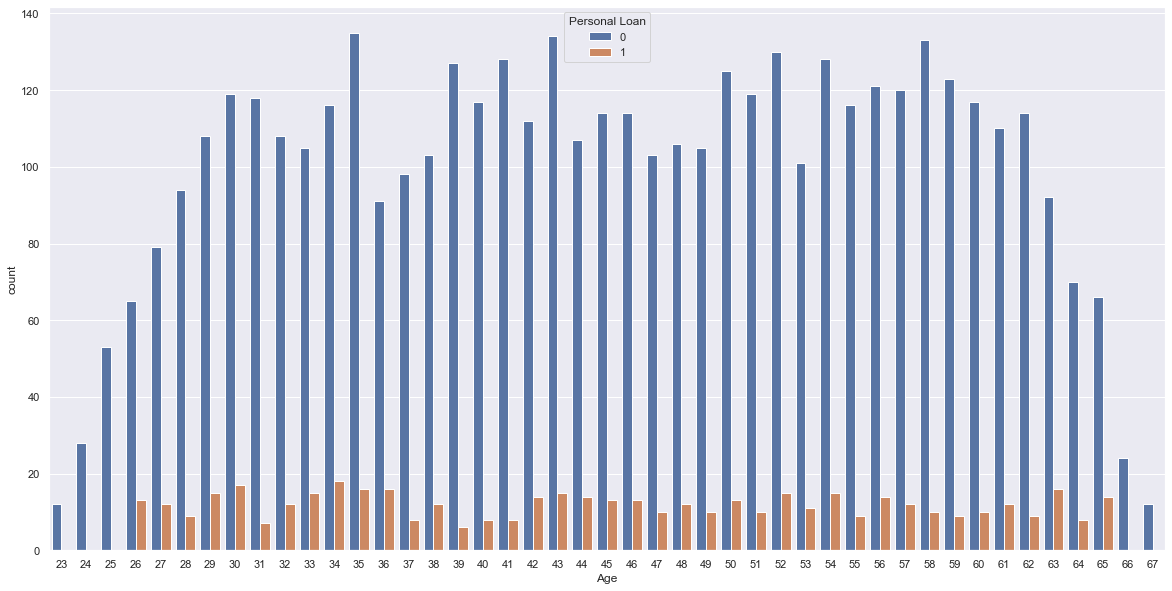

In [67]:
plt.figure(figsize=(20,10))
sns.countplot(bank_df['Age'], hue=bank_df['Personal Loan'])

plt.show()

Here, we can state that people of age group between 26 to 65 have taken personal loan. At the same time, the difference of people with Personal loan and without personal loan is huge.

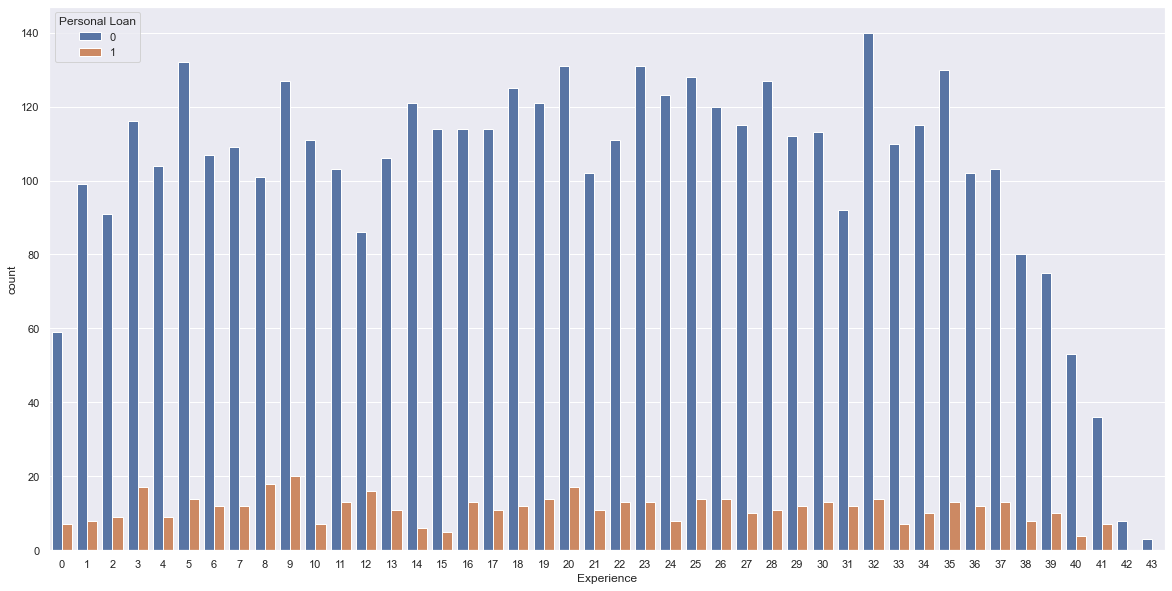

In [68]:
plt.figure(figsize=(20,10))
sns.countplot(bank_df['Experience'], hue=bank_df['Personal Loan'])

plt.show()

Here, we can state that experience of a professional does not affect buying of personal loan. People with different professional experience have taken personal loan as well as not taken personal loan.

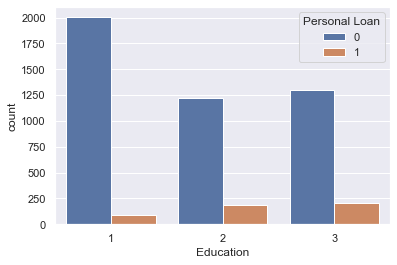

In [69]:
sns.countplot(x='Education',hue='Personal Loan',data=bank_df)

plt.show()

People who are Under Graduate have taken less personal loan as compared to the Graduate and the Advanced/Professionals.

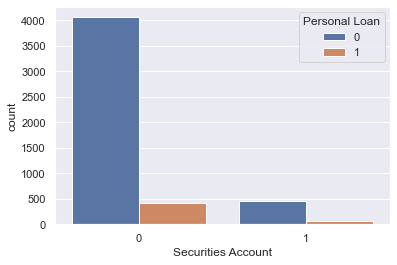

In [28]:
sns.countplot(x="Securities Account", data=bank_df, hue="Personal Loan")

plt.show()

Here, we can state that more people have taken personal loan who have no Security Account as compared to people with Security Account.

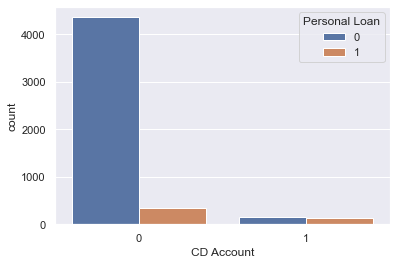

In [29]:
sns.countplot(x='CD Account',data=bank_df,hue='Personal Loan')

plt.show()

Here, we can state that customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

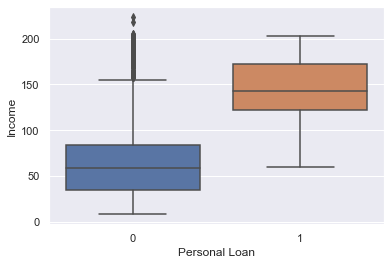

In [30]:
sns.boxplot(x='Personal Loan',y='Income',data=bank_df)

plt.show()

Here, we can state that people with less income do not have personal loan as compared to people with higher income who have taken Personal loan.

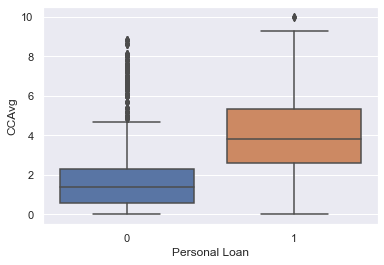

In [71]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=bank_df)

plt.show()

Here, we can state that people who have personal loan have a higher credit card average.

 ## Split the data into training and test set in the ratio of 70:30 respectively 

Before splitting, preparing the data to train the model

In [32]:
# Creating family dummy Variables
fa = pd.get_dummies(bank_df['Family'], prefix='Family')

# Adding the results to the temporary dataframe
bank_df1 = pd.concat([bank_df,fa], axis=1)

In [33]:
# Creating education dummy Variables  
ed = pd.get_dummies(bank_df['Education'], prefix='Education')

# Adding the results to the temporary dataframe
bank_df1 = pd.concat([bank_df1,ed], axis=1)

In [34]:
# bank_df1

In [35]:
# We have created dummies for the below variables, so we can drop them from the temporary dataset 
# Saving the resultant dataframe in a new dataframe

bank_df2 = bank_df1.drop(['Education','Family','Personal Loan'],1)


In [36]:
# bank_df2.shape
bank_df2.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_1',
       'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2',
       'Education_3'],
      dtype='object')

In [37]:
bank_df2.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
dtype: object

In [38]:
# Displaying the new dataframe
bank_df2.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,25.0,45.0,39.0,35.0,35.0,37.0,53.0,50.0,35.0,34.0
Experience,1.0,19.0,15.0,9.0,8.0,13.0,27.0,24.0,10.0,9.0
Income,49.0,34.0,11.0,100.0,45.0,29.0,72.0,22.0,81.0,180.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0,92121.0,91711.0,93943.0,90089.0,93023.0
CCAvg,1.6,1.5,1.0,2.7,1.0,0.4,1.5,0.3,0.6,8.9
Mortgage,0.0,0.0,0.0,0.0,0.0,155.0,0.0,0.0,104.0,0.0
Securities Account,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CD Account,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Online,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
CreditCard,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [39]:
X = bank_df2
y = bank_df1['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
X_train.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
4966,41,17,34,91361,0.7,143,0,0,0,0,1,0,0,0,1,0,0
4086,50,26,11,93106,0.2,0,1,0,0,0,0,0,0,1,1,0,0
2881,49,25,55,92103,0.1,0,0,0,1,0,0,0,0,1,0,0,1
1237,38,13,169,92093,6.8,0,0,1,1,1,1,0,0,0,0,0,1
1429,31,5,35,95064,0.6,171,0,0,0,0,1,0,0,0,0,0,1


In [41]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bank_df2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bank_df2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## Use different classification models (Logistic, K-NN and Naive Bayes) to predict the likelihood of a customer buying personal loans and displaying the confusion matrix for each model

### Logistic Regression Model

In [42]:
# Fitting the logistic model on training set

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Fitting the logistic model on test set

y_predict = logistic_model.predict(X_test)

# Co-efficent of all the values in the model

coef_df = pd.DataFrame(logistic_model.coef_)
coef_df['Intercept'] = logistic_model.intercept_
# coef_df
res_coef = coef_df.rename(index = {0:'Co-efficient'}, columns = {0: 'Age', 1: 'Experience', 2:'Income', 3:'ZIP Code', 4:'CCAvg', 5:'Mortgage', 6:'Securities Account', 7:'CD Account', 8:'Online', 9:'CreditCard', 10:'Family_1', 11:'Family_2', 12:'Family_3', 13:'Family_4', 14:'Education_1', 15:'Education_2', 16:'Education_3'})
res_coef.T


,Co-efficient
Age,7.975864e-05
Experience,4.689258e-05
Income,3.705401e-02
ZIP Code,-6.648701e-05
CCAvg,1.044506e-03
Mortgage,2.819154e-04
Securities Account,1.843512e-05
CD Account,1.294280e-04
Online,-1.215582e-05
CreditCard,1.004178e-06


In [43]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_model.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Confusion Matrix for the Logistic Regression Model

[[1304   38]
 [ 112   46]]


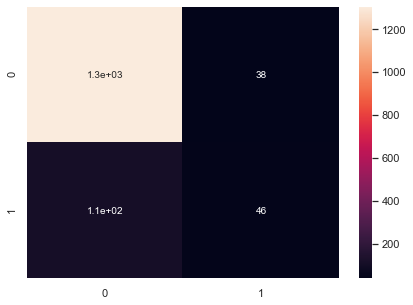

In [70]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

plt.figure(figsize = (7,5))

sns.heatmap(confusion_matrix, annot=True)

plt.show()

###  Applying K- Nearest Neighbour Algorithm

In [45]:
# Keeping number of neighbours as 3
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform' )
NNH.fit(X_train, y_train)
predicted_labels_KNN = NNH.predict(X_test)

In [46]:
NNH.score(X_test, y_test)
print('Mean Accuracy:', NNH.score(X_test, y_test))

Mean Accuracy: 0.8866666666666667


### Confusion Matrix for the K- Nearest Neighbour Model

In [47]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1287   55]
 [ 115   43]]


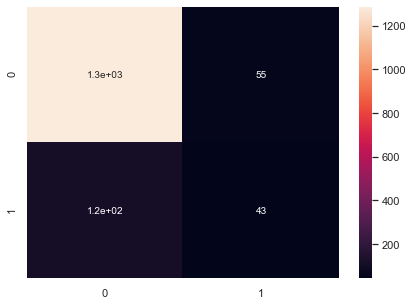

In [72]:
confusion_matrix1 = metrics.confusion_matrix(y_test, predicted_labels_KNN)
# print(confusion_matrix1)

plt.figure(figsize = (7,5))

sns.heatmap(confusion_matrix1, annot=True)

plt.show()

 ### Applying Gaussian Naive Bayes Algorithm

In [49]:
GNB1 = GaussianNB()
GNB1.fit(X_train, y_train)
predicted_labels_GNB = GNB1.predict(X_test)

GNB1.score(X_test, y_test)

0.904

### Confusion Matrix for the Gaussian Naive Bayes Model

[[1254   88]
 [  56  102]]


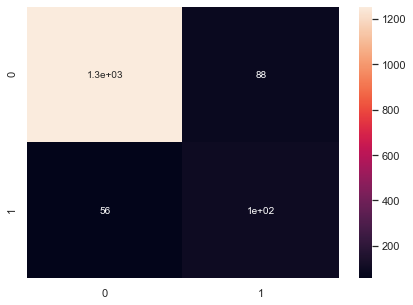

In [73]:
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

confusion_matrix2 = metrics.confusion_matrix(y_test, predicted_labels_GNB)
# print(confusion_matrix1)

plt.figure(figsize = (7,5))

sns.heatmap(confusion_matrix2, annot=True)

plt.show()

## Model comparison to find out the best model

### Logistic Regression Model

In [51]:
# print(confusion_matrix[0][0])
# print(confusion_matrix[0][1])
# print(confusion_matrix[1][0])
# print(confusion_matrix[1][1])

In [52]:
#true positives (TP): Predicted yes, and actually took loan.
TP=confusion_matrix[1][1]
#true negatives (TN): Predicted no, and they actually did not took loan.
TN=confusion_matrix[0][0]
#false positives (FP): Predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=confusion_matrix[0][1]
#false negatives (FN): Predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=confusion_matrix[1][0]

In [53]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy of logistic regression classifier on test set: 90.00%
Misclassification Rate: It is often wrong: 10.00%
Sensitivity: When its actually yes how often it predicts yes: 29.11%
Specificity: When its actually no, how often does it predict no: 97.17%
Precision: When it predicts yes, how often is it correct: 54.76%


### K- Nearest Neighbour Model

In [54]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=confusion_matrix1[1][1]
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=confusion_matrix1[0][0]
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=confusion_matrix1[0][1]
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=confusion_matrix1[1][0]

In [55]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Mean accuracy: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Mean accuracy: 88.67%
Misclassification Rate: It is often wrong: 11.33%
Sensitivity: When its actually yes how often it predicts yes: 27.22%
Specificity: When its actually no, how often does it predict no: 95.90%
Precision: When it predicts yes, how often is it correct: 43.88%


### Gaussian Naiye Bayes Model

In [56]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=confusion_matrix2[1][1]
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=confusion_matrix2[0][0]
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=confusion_matrix2[0][1]
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=confusion_matrix2[1][0]

In [57]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Mean accuracy: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Mean accuracy: 90.40%
Misclassification Rate: It is often wrong: 9.60%
Sensitivity: When its actually yes how often it predicts yes: 64.56%
Specificity: When its actually no, how often does it predict no: 93.44%
Precision: When it predicts yes, how often is it correct: 53.68%


### ROC Curve

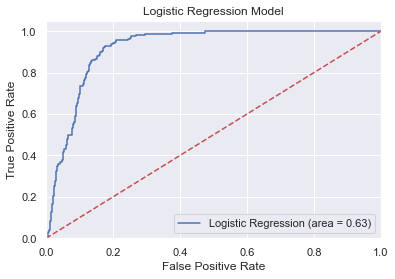

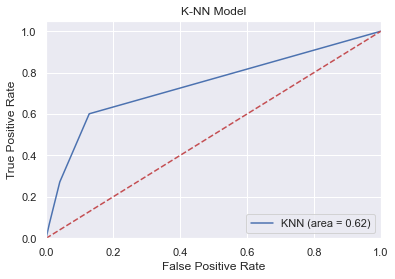

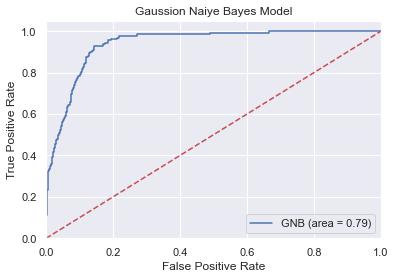

In [58]:
#ROC Curve

# plt.figure(figsize=(20,5))
logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()

#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH.predict(X_test))
# print("Area under ROC: ",KNN_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-NN Model')
plt.legend(loc="lower right")
plt.show()

#ROC Curve
GNB_roc_auc = roc_auc_score(y_test, GNB1.predict(X_test))
# print('Area under ROC:',GNB_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, GNB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussion Naiye Bayes Model')
plt.legend(loc="lower right")
plt.show()

#### Logistic Regression Model

   - Accuracy of logistic regression classifier on test set: 90.00%
   - Misclassification Rate: It is often wrong: 10.00%
   - Sensitivity: When its actually yes how often it predicts yes: 29.11%
   - Specificity: When its actually no, how often does it predict no: 97.17%
   - Precision: When it predicts yes, how often is it correct: 54.76%

#### K-Nearest Neighbour Model

   - Mean accuracy: 88.67%
   - Misclassification Rate: It is often wrong: 11.33%
   - Sensitivity: When its actually yes how often it predicts yes: 27.22%
   - Specificity: When its actually no, how often does it predict no: 95.90%
   - Precision: When it predicts yes, how often is it correct: 43.88%

#### Gaussian Naiye Bayes Model

   - Mean accuracy: 90.40%
   - Misclassification Rate: It is often wrong: 9.60%
   - Sensitivity: When its actually yes how often it predicts yes: 64.56%
   - Specificity: When its actually no, how often does it predict no: 93.44%
   - Precision: When it predicts yes, how often is it correct: 53.68%

##### In this case, the best model would be Gaussian Naiye Bayes model.
- Because this model performed better when compared to the other models with the below rates in
   - Accuracy: 90.40% 
   - Misclassification: 9.60%
   - Sensitivity: 64.56%
- Also, the area under ROC is the highest in this model with 0.79. (More the area under ROC better the model performs)

## Conclusion:
   Gaussian Naiye Bayes Model will have the highest accuracy when predicting the likelihood of a liability customer buying personal loans with the lowest misclassifications.